In [1]:
import pandas as pd

In [2]:
ass_data = pd.read_csv('../src/data/assessor_clean.csv', parse_dates=['CurrentSalesDate'])

/home/alex/EECS_731/EECS731_FinalProject/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preliminary Cleaning

This data is very messy, and needs some work right off the bat.  For starters, many rows have 0 or null values for key columns we want to draw conclusions on.  Some of these make sense, for instance empty lots will have a property area and assessed improvement value of 0.  Others, like a lot area of 0 seem to indicate some error in reporting.

Next, there are a number of properties where PropertyArea > LotArea * NumberofStories, which should be impossible.

Finally, a couple *huge* lots in the millions of square feet are excluded from analysis since they dwarf all others by orders of magnitude

In [3]:
ass_data = ass_data.query('PropertyArea > 0 and LotArea > 0 and NumberofStories > 0 and AssessedImprovementValue > 0')

# about 4 thousand properties are listed as having more square feet than is possible, not sure why
ass_data = ass_data.query('PropertyArea <= LotArea * NumberofStories')

ass_data = ass_data.query('LotArea < 300000')

# Data Exploration

As we would expect, a definite positive correlation exists between property area and property value.  Some anomalies can already be picked out by eye from this graph

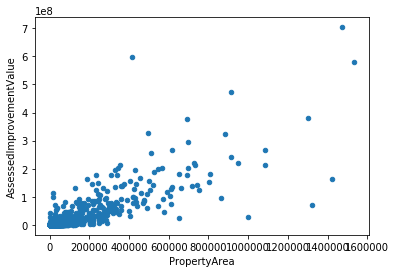

In [4]:
ass_data.plot.scatter(x='PropertyArea', y='AssessedImprovementValue')

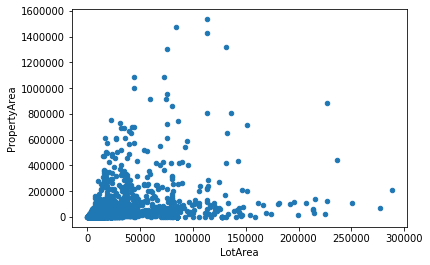

In [5]:
ass_data.plot.scatter(x='LotArea', y='PropertyArea')

In [6]:
ass_data.dtypes

ClosedRollYear                          float64
PropertyLocation                         object
ParcelNumber                             object
Block                                    object
Lot                                      object
VolumeNumber                              int64
UseCode                                  object
UseDefinition                            object
PropertyClassCode                        object
PropertyClassCodeDefinition              object
YearPropertyBuilt                       float64
NumberofBathrooms                       float64
NumberofBedrooms                          int64
NumberofRooms                             int64
NumberofStories                           int64
NumberofUnits                             int64
ZoningCode                               object
ConstructionType                         object
LotDepth                                float64
LotFrontage                             float64
PropertyArea                            

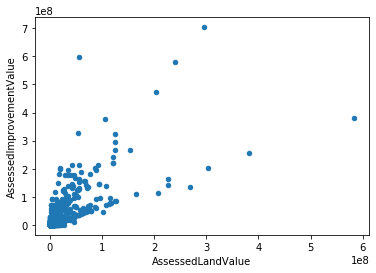

In [7]:
ass_data.plot.scatter(x='AssessedLandValue', y='AssessedImprovementValue')

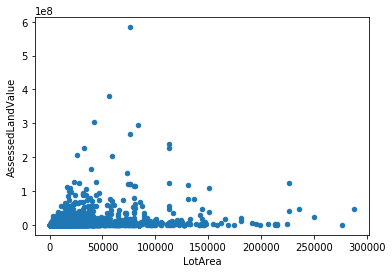

In [8]:
ass_data.plot.scatter(x='LotArea', y='AssessedLandValue')

In [9]:
ass_data

,ClosedRollYear,PropertyLocation,ParcelNumber,Block,Lot,VolumeNumber,UseCode,UseDefinition,PropertyClassCode,PropertyClassCodeDefinition,...,SupervisorDistrict,AnalysisNeighborhood,the_geom,RowID,SalesYear,SalesMonth,SalesDay,Location,X,Y
3,2017.0,0000 0321 polaris wy0000,6498012,6498,012,38,sres,single family residential,d,dwelling,...,11,excelsior,point (-122.43921944249 37.708275212573),20176498012,NaN,NaN,NaN,-122.43921944249 37.708275212573,-122.439219,37.708275
39,2017.0,0000 0001 beach st0000,0018001,0018,001,1,como,commercial office,o,office,...,3,north beach,point (-122.409572555271 37.807747698424),20170018001,2012.0,1.0,25.0,-122.409572555271 37.807747698424,-122.409573,37.807748
75,2017.0,3012 3000 larkin st0000,0025024,0025,024,1,mres,multi-family residential,a,apartment,...,2,russian hill,point (-122.421816799035 37.805749562714),20170025024,2009.0,5.0,29.0,-122.421816799035 37.805749562714,-122.421817,37.805750
80,2017.0,0000 0281 jefferson st0000,0012007,0012,007,1,comr,commercial retail,c,commercial stores,...,3,north beach,point (-122.416674150176 37.807818006395),20170012007,NaN,NaN,NaN,-122.416674150176 37.807818006395,-122.416674,37.807818
81,2017.0,0000 1333 columbus av0000,0024017,0024,017,1,comr,commercial retail,c,commercial stores,...,2,russian hill,point (-122.41955614239 37.806453733581),20170024017,1988.0,5.0,5.0,-122.41955614239 37.806453733581,-122.419556,37.806454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207841,2017.0,0000 0136 inverness dr0000,7211012,7211,012,44,sres,single family residential,d,dwelling,...,7,sunset/parkside,point (-122.482445509721 37.731844627907),20177211012,NaN,NaN,NaN,-122.482445509721 37.731844627907,-122.482446,37.731845
207842,2017.0,0000 0456 gold mine dr0000,7527015,7527,015,44,sres,single family residential,d,dwelling,...,8,glen park,point (-122.436926779921 37.739352606223),20177527015,2016.0,11.0,4.0,-122.436926779921 37.739352606223,-122.436927,37.739353
207843,2017.0,0000 0215 sargent st0000,7089047,7089,047,42,sres,single family residential,d,dwelling,...,11,oceanview/merced/ingleside,point (-122.464739571357 37.715912783657),20177089047,NaN,NaN,NaN,-122.464739571357 37.715912783657,-122.464740,37.715913
207845,2017.0,0000 0076 cameo wy0000,7513047,7513,047,44,sres,single family residential,d,dwelling,...,8,noe valley,point (-122.443491596582 37.74459693514),20177513047,2003.0,10.0,3.0,-122.443491596582 37.74459693514,-122.443492,37.744597
